In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import torch

In [8]:
df = pd.read_csv('/Users/baptistecarbillet/Documents/MachineLearning1/winequality-white.csv',sep=';')
df['y'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df = df.drop('quality',axis=1)

X,y = np.array(df.drop('y',axis=1)),np.array(df['y'])

#Normalize X
X = (X - np.mean(X,axis=0))/np.std(X,axis=0)

from sklearn.model_selection import train_test_split

random_state = 75 #Paris

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=random_state)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()
X_val = torch.from_numpy(X_val).float()
y_val = torch.from_numpy(y_val).float()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
y_val = y_val.reshape(-1,1)

## Build a neural network model to predict wine quality



In [9]:
import torch
n_features = X_train.shape[1]
n_hidden = 8
n_output = 1
from torch import nn
class NeuralNetwork(nn.Module):
    
    def __init__(self,n_features,n_hidden,n_output,function=nn.Sigmoid()):
        super().__init__()
        self.hidden = nn.Linear(n_features,n_hidden)
        self.output = nn.Linear(n_hidden,n_output)
        self.function = function
        self.sigmoid = nn.Sigmoid()
        
    def forward(self,x):
        x = self.hidden(x)
        x = self.function(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

    
    


### Optim comparaison 

i compare the Sgd optimizer with the Adam optimizer

In [72]:
from torch.utils.data import DataLoader
torch.manual_seed(75)
train_dataloader = DataLoader(torch.utils.data.TensorDataset(X_train,y_train),batch_size=64,shuffle=False)



In [12]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.SGD(network.parameters(),lr=0.01)






train_score = []
val_score = []
loss_track = []
val_loss = []
Epochs = 10000

for epoch in range(Epochs):
    
    for _,data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train)
    output_val = network(X_val)
    loss_track.append(loss(output_train,y_train).item())
    val_loss.append(loss(output_val,y_val).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score.append(f1_score(y_train,output_train))
    val_score.append(f1_score(y_val,output_val))
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track[-1]} - Val loss {val_loss[-1]} - Train score {train_score[-1]} - Val score {val_score[-1]}')
    

        
       

Epoch 0 : Train loss 0.5353098511695862 - Val loss 0.5494431853294373 - Train score 0.0 - Val score 0.0
Epoch 10 : Train loss 0.4970107674598694 - Val loss 0.516630232334137 - Train score 0.0 - Val score 0.0
Epoch 20 : Train loss 0.48131921887397766 - Val loss 0.4991105794906616 - Train score 0.0 - Val score 0.0
Epoch 30 : Train loss 0.4679689407348633 - Val loss 0.4841010868549347 - Train score 0.0 - Val score 0.0
Epoch 40 : Train loss 0.45723968744277954 - Val loss 0.4719524383544922 - Train score 0.0 - Val score 0.0
Epoch 50 : Train loss 0.4491220712661743 - Val loss 0.46272408962249756 - Train score 0.014792899408284025 - Val score 0.0
Epoch 60 : Train loss 0.4431837797164917 - Val loss 0.4559958279132843 - Train score 0.0659971305595409 - Val score 0.05405405405405406
Epoch 70 : Train loss 0.43884581327438354 - Val loss 0.4511517882347107 - Train score 0.12121212121212123 - Val score 0.11282051282051281
Epoch 80 : Train loss 0.43560895323753357 - Val loss 0.4476337730884552 - Trai

KeyboardInterrupt: 

In [11]:
for epoch in range(10000,20000):
    
    for _,data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train)
    output_val = network(X_val)
    loss_track.append(loss(output_train,y_train).item())
    val_loss.append(loss(output_val,y_val).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score.append(f1_score(y_train,output_train))
    val_score.append(f1_score(y_val,output_val))
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track[-1]} - Val loss {val_loss[-1]} - Train score {train_score[-1]} - Val score {val_score[-1]}')
    

        

NameError: name 'optimizer' is not defined

Text(0.5, 0, 'Epochs')

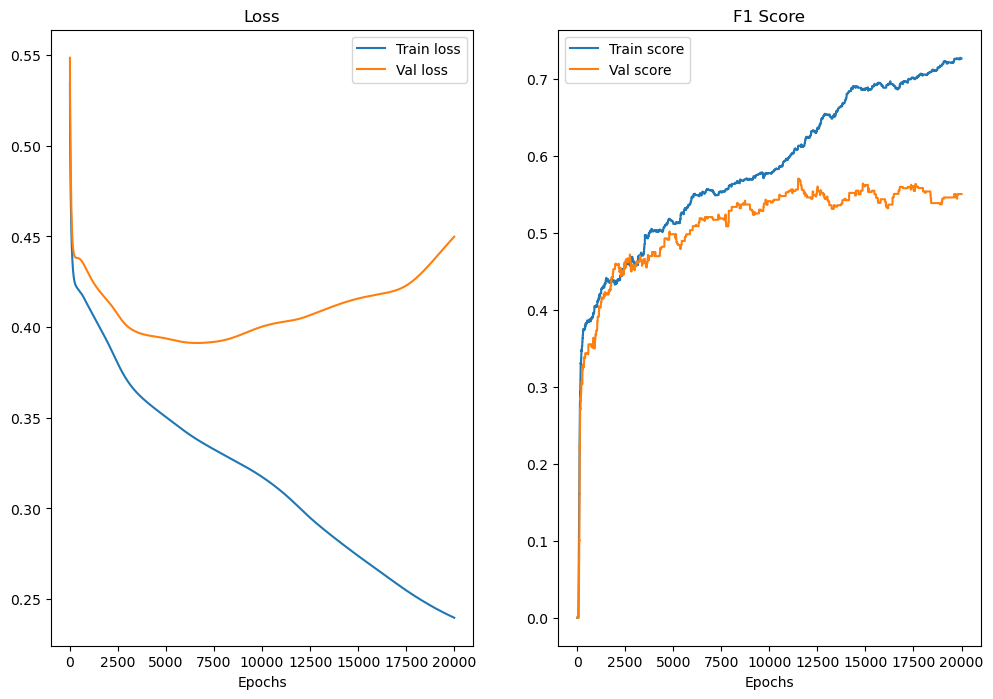

In [34]:
#plot learning curves
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].plot(loss_track,label='Train loss')
ax[0].plot(val_loss,label='Val loss')
ax[0].legend()
ax[1].plot(train_score,label='Train score')
ax[1].plot(val_score,label='Val score')
ax[1].legend()
ax[0].set_title('Loss')
ax[1].set_title('F1 Score')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')

AADAM

In [13]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_adam = []
val_score_adam = []
loss_track_adam = []
val_loss_adam = []
Epochs = 3000

for epoch in range(Epochs):
    
    for _,data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    #Add train and validation score (F1) and loss (BCE) to the lists
    output_train = network(X_train)
    output_val = network(X_val)
    loss_track_adam.append(loss(output_train,y_train).item())
    val_loss_adam.append(loss(output_val,y_val).item())
    
    output_train = output_train.detach().numpy()
    output_val = output_val.detach().numpy()
    
    output_train = np.where(output_train > 0.5,1,0)
    output_val = np.where(output_val > 0.5,1,0)
    
    train_score_adam.append(f1_score(y_train,output_train))
    val_score_adam.append(f1_score(y_val,output_val))
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch} : Train loss {loss_track_adam[-1]} - Val loss {val_loss_adam[-1]} - Train score {train_score_adam[-1]} - Val score {val_score_adam[-1]}')
   

        
       

Epoch 0 : Train loss 0.44830185174942017 - Val loss 0.4597339332103729 - Train score 0.011851851851851851 - Val score 0.0
Epoch 10 : Train loss 0.3987528085708618 - Val loss 0.4219551086425781 - Train score 0.4050901378579003 - Val score 0.39215686274509803
Epoch 20 : Train loss 0.37438535690307617 - Val loss 0.4107140600681305 - Train score 0.4234042553191489 - Val score 0.42307692307692313
Epoch 30 : Train loss 0.34774357080459595 - Val loss 0.4038199484348297 - Train score 0.4474789915966387 - Val score 0.4061302681992337
Epoch 40 : Train loss 0.32730138301849365 - Val loss 0.40489086508750916 - Train score 0.5130784708249497 - Val score 0.43283582089552236
Epoch 50 : Train loss 0.3118212819099426 - Val loss 0.40922942757606506 - Train score 0.5447470817120623 - Val score 0.44525547445255476
Epoch 60 : Train loss 0.29705384373664856 - Val loss 0.41068780422210693 - Train score 0.5916030534351144 - Val score 0.471830985915493
Epoch 70 : Train loss 0.28423312306404114 - Val loss 0.413

KeyboardInterrupt: 

Best score with SGD : 0.5704918032786884
Best score with Adam : 0.6029850746268657
Best epoch for SGD : 11492
Best epoch for Adam : 683


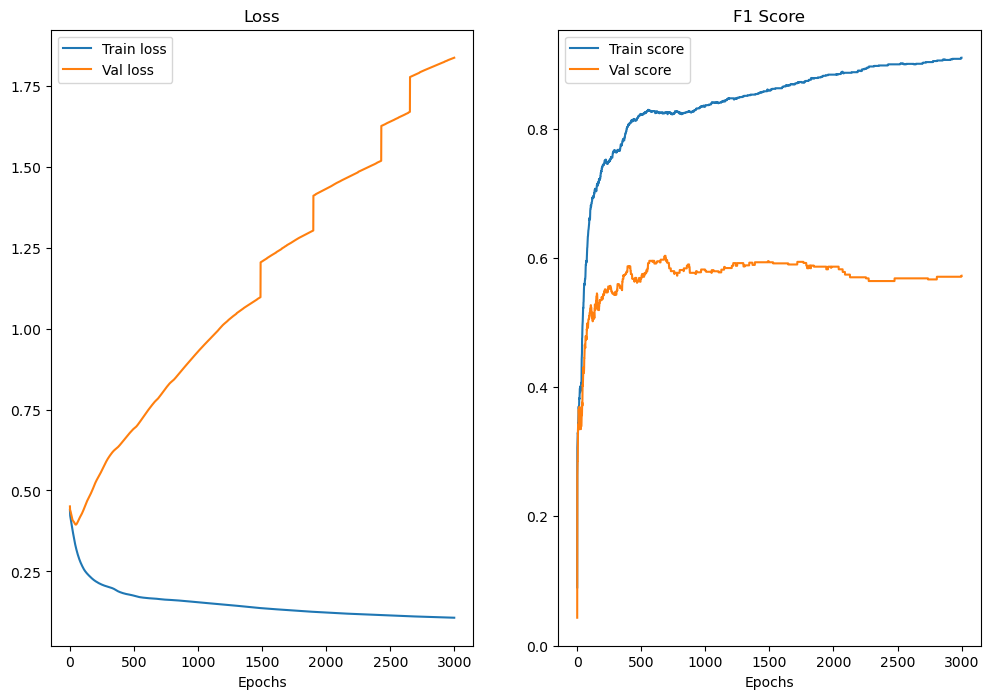

In [39]:
#learning curves
fig, ax = plt.subplots(1,2,figsize=(12,8))
ax[0].plot(loss_track_adam,label='Train loss')
ax[0].plot(val_loss_adam,label='Val loss')
ax[0].legend()
ax[1].plot(train_score_adam,label='Train score')
ax[1].plot(val_score_adam,label='Val score')
ax[1].legend()
ax[0].set_title('Loss')
ax[1].set_title('F1 Score')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')

#print best score
print(f'Best score with SGD : {max(val_score)}')
print(f'Best score with Adam : {max(val_score_adam)}')

#Print best epoch for SGD
print(f'Best epoch for SGD : {np.argmax(val_score)}')
print(f'Best epoch for Adam : {np.argmax(val_score_adam)}')



# Lr tuning

In [38]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_lr = {}
val_score_lr = {}
loss_track_lr = {}
val_loss_lr= {}
Epochs = 4000
hidden = 32
for acti in [0.1,0.01,0.001,0.0001]:
    print(f'Hidden layer size : {hidden}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork(n_features,hidden,n_output)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=acti)
    
    train_score_lr[acti] = []
    val_score_lr[acti] = []
    loss_track_lr[acti] = []
    val_loss_lr[acti] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_loss_lr[acti][-1] > val_loss_lr[acti][-2] and val_loss_lr[acti][-2] > val_loss_lr[acti][-3] and val_loss_lr[acti][-3] > val_loss_lr[acti][-4] and val_loss_lr[acti][-4] > val_loss_lr[acti][-5]:
            print(f'{acti}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_lr[acti])} at epoch {np.argmax(val_score_lr[acti])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_lr[acti].append(loss(output_train,y_train).item())
        val_loss_lr[acti].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_lr[acti].append(f1_score(y_train,output_train))
        val_score_lr[acti].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_lr[acti][-1]} - Val loss {val_loss_lr[acti][-1]} - Train score {train_score_lr[acti][-1]} - Val score {val_score_lr[acti][-1]}')
    


Hidden layer size : 32
Epoch 0 : Train loss 0.42380887269973755 - Val loss 0.45007696747779846 - Train score 0.08146067415730338 - Val score 0.02162162162162162
Epoch 100 : Train loss 0.22485004365444183 - Val loss 0.5496787428855896 - Train score 0.7403685092127305 - Val score 0.5080385852090032
0.1Early stopping at epoch 102
Best score : 0.5391849529780566 at epoch 89
Hidden layer size : 32
Epoch 0 : Train loss 0.443444162607193 - Val loss 0.45561355352401733 - Train score 0.032210834553440704 - Val score 0.011049723756906079
Epoch 100 : Train loss 0.25012025237083435 - Val loss 0.424887090921402 - Train score 0.6837909654561559 - Val score 0.5298013245033112
0.01Early stopping at epoch 101
Best score : 0.5364238410596027 at epoch 98
Hidden layer size : 32
Epoch 0 : Train loss 0.5255762338638306 - Val loss 0.5392001271247864 - Train score 0.0 - Val score 0.0
Epoch 100 : Train loss 0.39799922704696655 - Val loss 0.41837796568870544 - Train score 0.43461160275319566 - Val score 0.43727

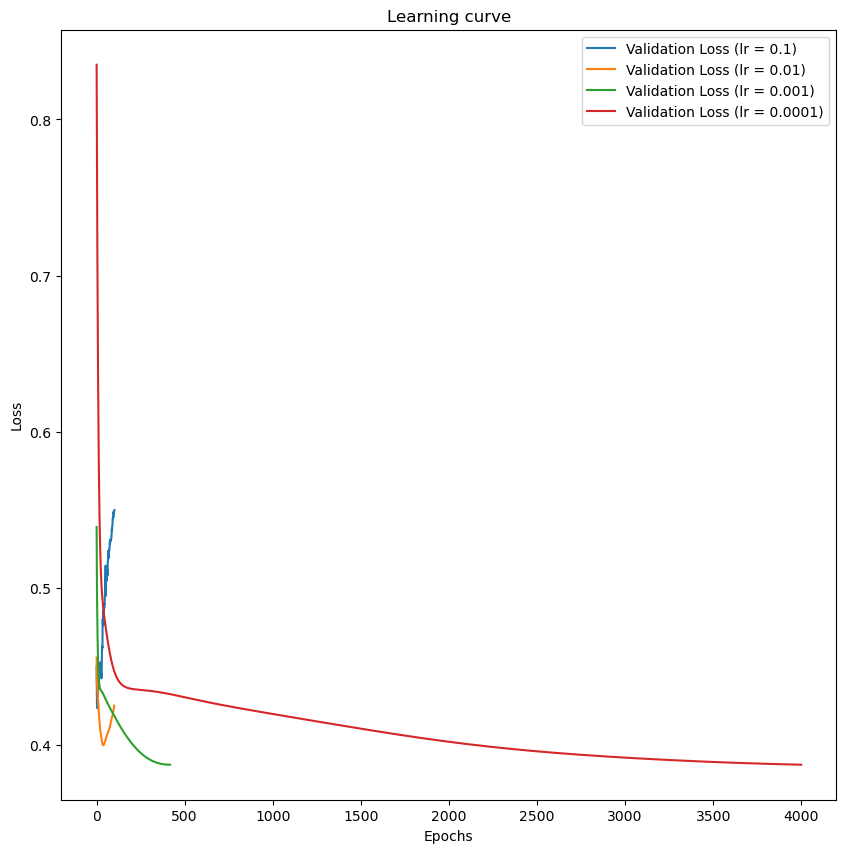

In [44]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
#ax.plot(loss_track_lr[0.1],label='Train Loss (lr = 0.1)',linestyle='--')
ax.plot(val_loss_lr[0.1],label='Validation Loss (lr = 0.1)')
#ax.plot(loss_track_lr[0.01],label='Train Loss (lr = 0.01)',linestyle='--')
ax.plot(val_loss_lr[0.01],label='Validation Loss (lr = 0.01)')
#ax.plot(loss_track_lr[0.001],label='Train Loss (lr = 0.001)',linestyle='--')
ax.plot(val_loss_lr[0.001],label='Validation Loss (lr = 0.001)')
#ax.plot(loss_track_lr[0.0001],label='Train Loss (lr = 0.0001)',linestyle='--')
ax.plot(val_loss_lr[0.0001],label='Validation Loss (lr = 0.0001)')

#log x axis
#ax.set_xscale('log')
ax.set_title('Learning curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()


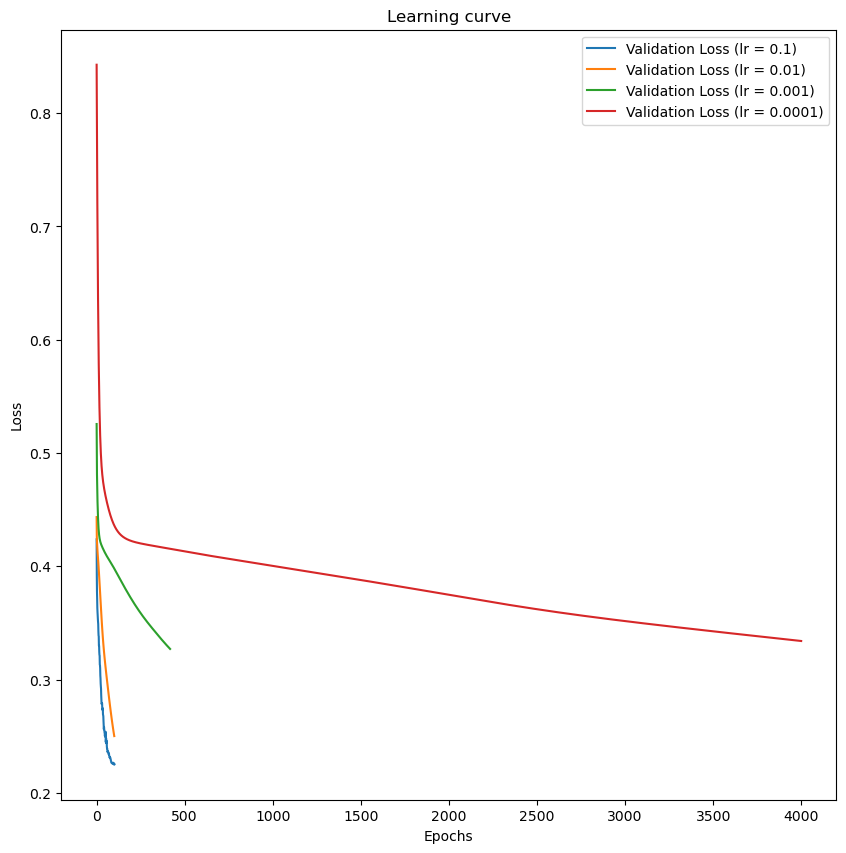

In [41]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
#ax.plot(train_score[0.1],label='Train Loss (lr = 0.1)',linestyle='--')
ax.plot(loss_track_lr[0.1],label='Validation Loss (lr = 0.1)')
#ax.plot(train_score[0.01],label='Train Loss (lr = 0.01)',linestyle='--')
ax.plot(loss_track_lr[0.01],label='Validation Loss (lr = 0.01)')
#ax.plot(train_score[0.001],label='Train Loss (lr = 0.001)',linestyle='--')
ax.plot(loss_track_lr[0.001],label='Validation Loss (lr = 0.001)')
ax.plot(loss_track_lr[0.0001],label='Validation Loss (lr = 0.0001)')
ax.set_title('Learning curve')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

## Activation tuning

In [14]:
activation = [torch.nn.functional.sigmoid,torch.nn.functional.relu,torch.nn.functional.tanh]

In [18]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_h = {}
val_score_h = {}
loss_track_h = {}
val_loss_h= {}
Epochs = 1000
hidden = 64
for acti,function in zip(['sigmoid','relu','tanh'],activation):
    print(f'Hidden layer size : {hidden}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork(n_features,hidden,n_output,function=function)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_h[acti] = []
    val_score_h[acti] = []
    loss_track_h[acti] = []
    val_loss_h[acti] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_h[acti][-1] > val_score_h[acti][-2] and val_score_h[acti][-2] > val_score_h[acti][-3] and val_score_h[acti][-3] > val_score_h[acti][-4] and val_score_h[acti][-4] > val_score_h[acti][-5]:
            print(f'{acti}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_h[acti])} at epoch {np.argmax(val_score_h[acti])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_h[acti].append(loss(output_train,y_train).item())
        val_loss_h[acti].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_h[acti].append(f1_score(y_train,output_train))
        val_score_h[acti].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_h[acti][-1]} - Val loss {val_loss_h[acti][-1]} - Train score {train_score_h[acti][-1]} - Val score {val_score_h[acti][-1]}')
    


Hidden layer size : 64
Epoch 0 : Train loss 0.4329952299594879 - Val loss 0.44172558188438416 - Train score 0.30034924330616997 - Val score 0.26609442060085836
Epoch 100 : Train loss 0.20432253181934357 - Val loss 0.45989587903022766 - Train score 0.7420494699646644 - Val score 0.5082508250825082
sigmoidEarly stopping at epoch 181
Best score : 0.6081504702194357 at epoch 180
Hidden layer size : 64
Epoch 0 : Train loss 0.4080447852611542 - Val loss 0.44058942794799805 - Train score 0.39029768467475195 - Val score 0.35627530364372473
Epoch 100 : Train loss 0.2290751338005066 - Val loss 0.5054897665977478 - Train score 0.7423868312757202 - Val score 0.5861027190332326
reluEarly stopping at epoch 200
Best score : 0.5945945945945946 at epoch 103
Hidden layer size : 64
Epoch 0 : Train loss 0.43702051043510437 - Val loss 0.46991968154907227 - Train score 0.2323353293413174 - Val score 0.19444444444444445
Epoch 100 : Train loss 0.17166903614997864 - Val loss 0.5370271801948547 - Train score 0.

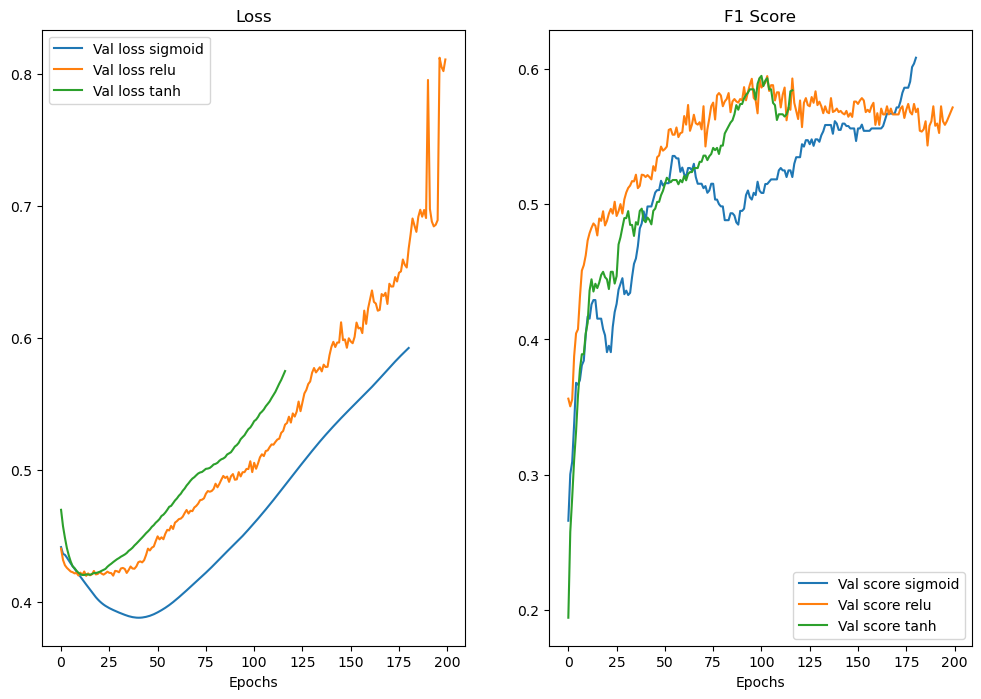

In [19]:
#plot the learning curves
fig, ax = plt.subplots(1,2,figsize=(12,8))

for acti in ['sigmoid','relu','tanh']:
    
    #ax[0].plot(loss_track_h[acti],label=f'Train loss {acti}')
    ax[0].plot(val_loss_h[acti],label=f'Val loss {acti}')
    #ax[1].plot(train_score_h[acti],label=f'Train score {acti}')
    ax[1].plot(val_score_h[acti],label=f'Val score {acti}')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title('Loss')
    ax[1].set_title('F1 Score')
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')

### optimized n_hidden

In [73]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_h = {}
val_score_h = {}
loss_track_h = {}
val_loss_h= {}
Epochs = 400
for hidden in [4,8,16,32,64,128,256]:
    print(f'Hidden layer size : {hidden}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork(n_features,hidden,n_output)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_h[hidden] = []
    val_score_h[hidden] = []
    loss_track_h[hidden] = []
    val_loss_h[hidden] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_h[hidden][-1] < val_score_h[hidden][-2] and val_score_h[hidden][-2] < val_score_h[hidden][-3] and val_score_h[hidden][-3] < val_score_h[hidden][-4] and val_score_h[hidden][-4] < val_score_h[hidden][-5]:
            print(f'{hidden}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_h[hidden])} at epoch {np.argmax(val_score_h[hidden])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_h[hidden].append(loss(output_train,y_train).item())
        val_loss_h[hidden].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_h[hidden].append(f1_score(y_train,output_train))
        val_score_h[hidden].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_h[hidden][-1]} - Val loss {val_loss_h[hidden][-1]} - Train score {train_score_h[hidden][-1]} - Val score {val_score_h[hidden][-1]}')
    

            

Hidden layer size : 4
Epoch 0 : Train loss 0.4747883081436157 - Val loss 0.48701608180999756 - Train score 0.0 - Val score 0.0
Epoch 100 : Train loss 0.3773552179336548 - Val loss 0.41307589411735535 - Train score 0.471264367816092 - Val score 0.44043321299638993
Epoch 200 : Train loss 0.37485986948013306 - Val loss 0.4179243743419647 - Train score 0.4906015037593985 - Val score 0.42957746478873243
Epoch 300 : Train loss 0.3724024295806885 - Val loss 0.42838096618652344 - Train score 0.5 - Val score 0.4210526315789474
Hidden layer size : 8
Epoch 0 : Train loss 0.45429301261901855 - Val loss 0.46558302640914917 - Train score 0.0 - Val score 0.0
Epoch 100 : Train loss 0.3628212809562683 - Val loss 0.4177037179470062 - Train score 0.5004887585532747 - Val score 0.4412811387900356
Epoch 200 : Train loss 0.3496197462081909 - Val loss 0.4240677058696747 - Train score 0.5062082139446036 - Val score 0.45161290322580644
Epoch 300 : Train loss 0.346176415681839 - Val loss 0.4298979341983795 - Tr

In [75]:
from sklearn.metrics import f1_score
network = NeuralNetwork(n_features,32,n_output)


loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)







for hidden in [512]:
    print(f'Hidden layer size : {hidden}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork(n_features,hidden,n_output)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_h[hidden] = []
    val_score_h[hidden] = []
    loss_track_h[hidden] = []
    val_loss_h[hidden] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_h[hidden][-1] < val_score_h[hidden][-2] and val_score_h[hidden][-2] < val_score_h[hidden][-3] and val_score_h[hidden][-3] < val_score_h[hidden][-4] and val_score_h[hidden][-4] < val_score_h[hidden][-5]:
            print(f'{hidden}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_h[hidden])} at epoch {np.argmax(val_score_h[hidden])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_h[hidden].append(loss(output_train,y_train).item())
        val_loss_h[hidden].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_h[hidden].append(f1_score(y_train,output_train))
        val_score_h[hidden].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_h[hidden][-1]} - Val loss {val_loss_h[hidden][-1]} - Train score {train_score_h[hidden][-1]} - Val score {val_score_h[hidden][-1]}')
    


Hidden layer size : 512
Epoch 0 : Train loss 0.4406607151031494 - Val loss 0.4581257700920105 - Train score 0.2900232018561485 - Val score 0.24778761061946902
Epoch 100 : Train loss 0.1643604338169098 - Val loss 0.45428717136383057 - Train score 0.8440514469453376 - Val score 0.6390532544378698
Epoch 200 : Train loss 0.03889903426170349 - Val loss 0.7310096025466919 - Train score 0.9801829268292683 - Val score 0.6629213483146068
Epoch 300 : Train loss 0.019845351576805115 - Val loss 1.3466577529907227 - Train score 0.9817073170731708 - Val score 0.6491228070175439
512Early stopping at epoch 396
Best score : 0.6806282722513088 at epoch 390


In [76]:
## print best f1 score by hidden
for hidden in [4,8,16,32,64,128,256,512]:
    print(f'Best score for hidden layer size {hidden} : {max(val_score_h[hidden])} at epoch {np.argmax(val_score_h[hidden])}')
    #print corresponding train score
    print(f'Corresponding train score : {train_score_h[hidden][np.argmax(val_score_h[hidden])]}')
    

Best score for hidden layer size 4 : 0.45161290322580644 at epoch 109
Corresponding train score : 0.47272727272727266
Best score for hidden layer size 8 : 0.47386759581881527 at epoch 156
Corresponding train score : 0.5057692307692309
Best score for hidden layer size 16 : 0.5786163522012578 at epoch 380
Corresponding train score : 0.6712211784799316
Best score for hidden layer size 32 : 0.592814371257485 at epoch 315
Corresponding train score : 0.777307366638442
Best score for hidden layer size 64 : 0.6823529411764706 at epoch 264
Corresponding train score : 0.9386792452830188
Best score for hidden layer size 128 : 0.6746268656716418 at epoch 182
Corresponding train score : 0.9396078431372549
Best score for hidden layer size 256 : 0.706896551724138 at epoch 215
Corresponding train score : 0.9866071428571428
Best score for hidden layer size 512 : 0.6806282722513088 at epoch 390
Corresponding train score : 1.0


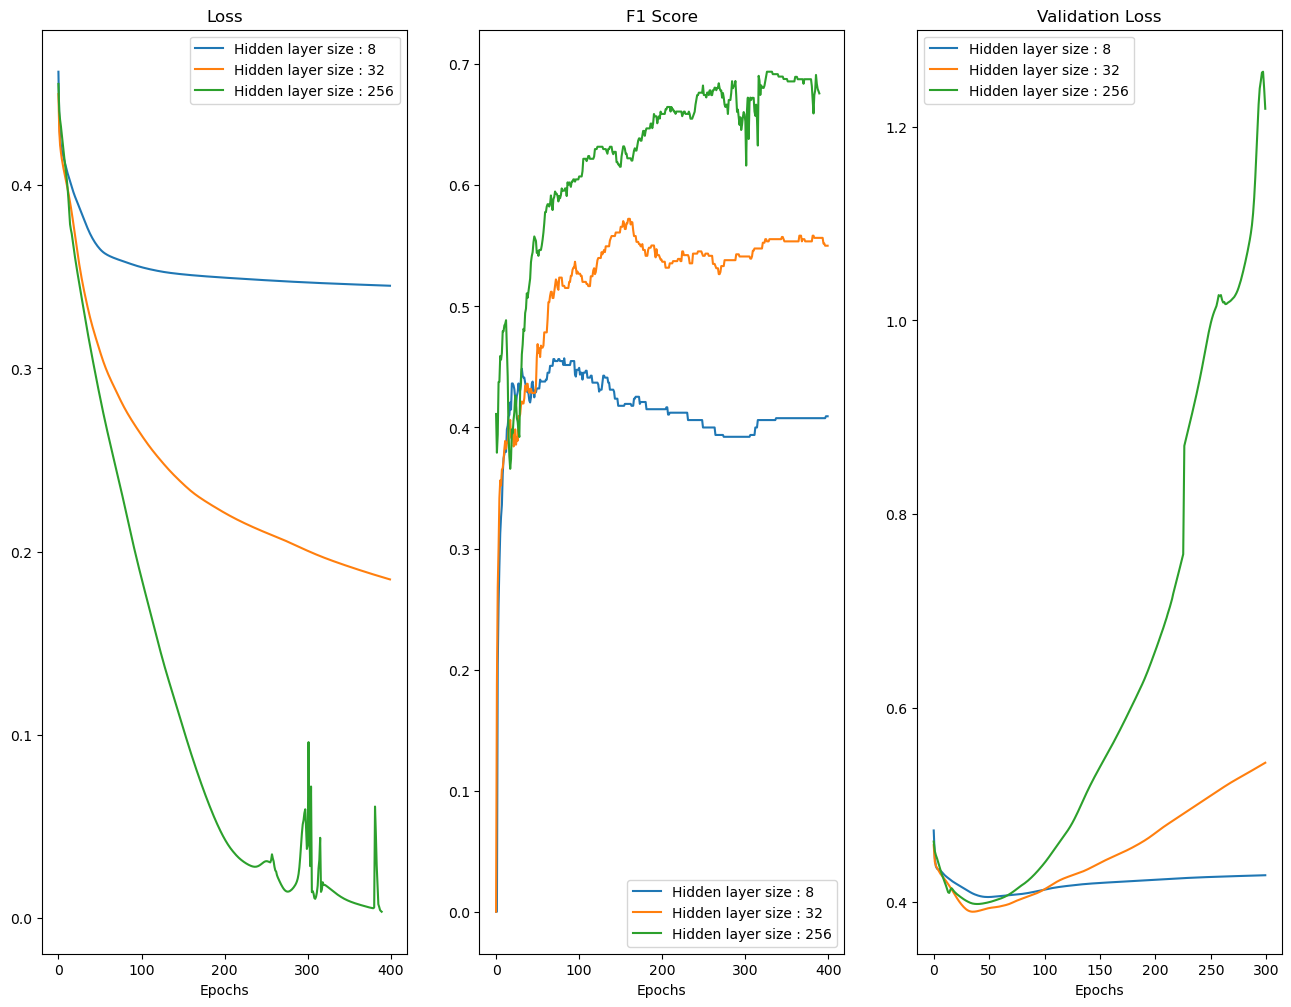

In [48]:
### Plot learning curves for different hidden layer sizes
fig, ax = plt.subplots(1,3,figsize=(16,12))

for hidden in [8,32,256]:
    ax[0].plot(loss_track_h[hidden],label=f'Hidden layer size : {hidden}')
    ax[1].plot(val_score_h[hidden],label=f'Hidden layer size : {hidden}')
    ax[0].legend()
    ax[1].legend()
    ax[0].set_title('Train Loss')
    ax[1].set_title('F1 Score (Validation)')
    ax[0].set_xlabel('Epochs')
    ax[1].set_xlabel('Epochs')
    
    #plot validation loss
    ax[2].plot(val_loss_h[hidden][:300],label=f'Hidden layer size : {hidden}')
    ax[2].legend()
    ax[2].set_title('Validation Loss')
    ax[2].set_xlabel('Epochs')
    
    

### Try neural network with 2 hidden layers


In [52]:
#define network with two hidden layers

from torch import nn

class NeuralNetwork2(nn.Module):
        
        def __init__(self,n_features,n_hidden,n_output,function=nn.Sigmoid()):
            super().__init__()
            self.hidden1 = nn.Linear(n_features,n_hidden)
            self.hidden2 = nn.Linear(n_hidden,n_hidden)
            self.output = nn.Linear(n_hidden,n_output)
            self.function = function
            self.sigmoid = nn.Sigmoid()
            
        def forward(self,x):
            x = self.hidden1(x)
            x = self.function(x)
            x = self.hidden2(x)
            x = self.function(x)
            x = self.output(x)
            x = self.sigmoid(x)
            return x

In [64]:
from sklearn.metrics import f1_score



loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_h2 = {}
val_score_h2 = {}
loss_track_h2 = {}
val_loss_h2= {}
Epochs = 500
for hidden in [4,8,16,32,64,128,256]:
    print(f'Hidden layer size : {hidden}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork2(n_features,hidden,n_output)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_h2[hidden] = []
    val_score_h2[hidden] = []
    loss_track_h2[hidden] = []
    val_loss_h2[hidden] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_h2[hidden][-1] < val_score_h2[hidden][-2] and val_score_h2[hidden][-2] < val_score_h2[hidden][-3] and val_score_h2[hidden][-3] < val_score_h2[hidden][-4] and val_score_h2[hidden][-4] < val_score_h2[hidden][-5]:
            print(f'{hidden}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_h2[hidden])} at epoch {np.argmax(val_score_h2[hidden])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_h2[hidden].append(loss(output_train,y_train).item())
        val_loss_h2[hidden].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_h2[hidden].append(f1_score(y_train,output_train))
        val_score_h2[hidden].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_h2[hidden][-1]} - Val loss {val_loss_h2[hidden][-1]} - Train score {train_score_h2[hidden][-1]} - Val score {val_score_h2[hidden][-1]}')
    


Hidden layer size : 4
Epoch 0 : Train loss 0.5044671893119812 - Val loss 0.5226132869720459 - Train score 0.0 - Val score 0.0
Epoch 100 : Train loss 0.3852594494819641 - Val loss 0.4170864224433899 - Train score 0.38095238095238093 - Val score 0.35
Epoch 200 : Train loss 0.38119250535964966 - Val loss 0.4143112301826477 - Train score 0.3766519823788546 - Val score 0.4
Epoch 300 : Train loss 0.3782046437263489 - Val loss 0.4183000922203064 - Train score 0.38924731182795697 - Val score 0.38735177865612647
Epoch 400 : Train loss 0.3733094036579132 - Val loss 0.4248632788658142 - Train score 0.4393305439330543 - Val score 0.398406374501992
Hidden layer size : 8
Epoch 0 : Train loss 0.49894726276397705 - Val loss 0.5199427604675293 - Train score 0.0 - Val score 0.0
Epoch 100 : Train loss 0.34529274702072144 - Val loss 0.39788347482681274 - Train score 0.48466257668711665 - Val score 0.4444444444444444
Epoch 200 : Train loss 0.3272339701652527 - Val loss 0.43335625529289246 - Train score 0.5

In [77]:
#print best f1 score by hidden
for hidden in [4,8,16,32,64,128,256]:
    print(f'Best score for hidden layer size {hidden} : {max(val_score_h2[hidden])} at epoch {np.argmax(val_score_h2[hidden])}')
    #print corresponding train score
    print(f'Corresponding train score : {train_score_h2[hidden][np.argmax(val_score_h2[hidden])]}')

Best score for hidden layer size 4 : 0.4124513618677043 at epoch 368
Corresponding train score : 0.4163179916317991
Best score for hidden layer size 8 : 0.5206349206349207 at epoch 450
Corresponding train score : 0.6313993174061433
Best score for hidden layer size 16 : 0.5592705167173252 at epoch 430
Corresponding train score : 0.810188989317995
Best score for hidden layer size 32 : 0.6685714285714286 at epoch 434
Corresponding train score : 0.9770992366412213
Best score for hidden layer size 64 : 0.6776859504132232 at epoch 101
Corresponding train score : 0.9577677224736049
Best score for hidden layer size 128 : 0.6778711484593838 at epoch 445
Corresponding train score : 1.0
Best score for hidden layer size 256 : 0.6968838526912182 at epoch 157
Corresponding train score : 0.9985052316890882


Text(0.5, 0, 'Epochs')

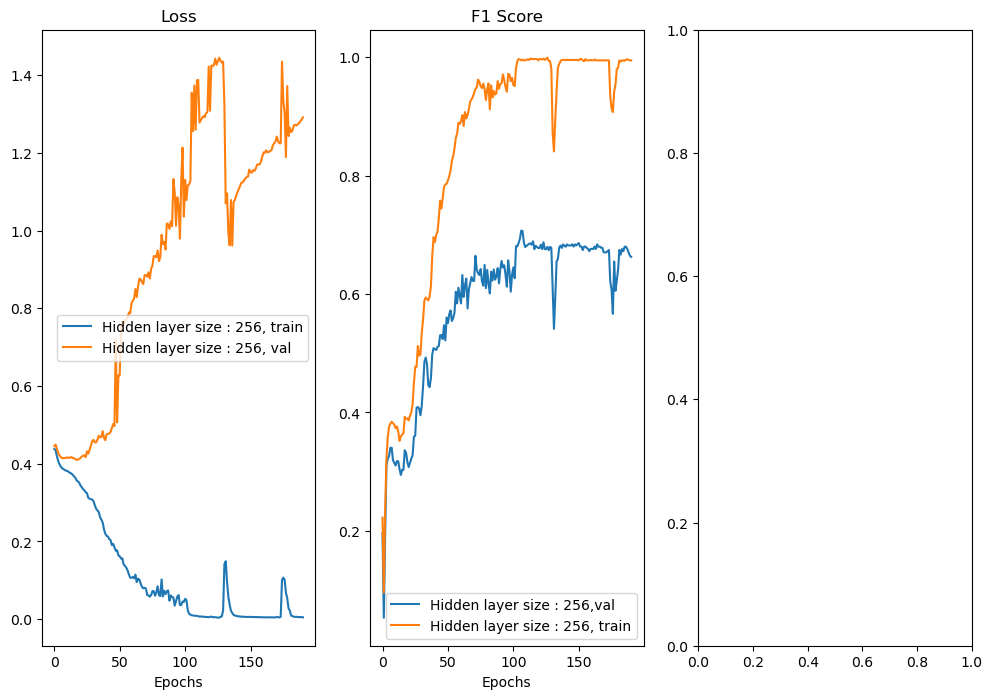

In [61]:
## plot learning curves for two hidden layers, for hidden = 256 only
fig, ax = plt.subplots(1,3,figsize=(12,8))

ax[0].plot(loss_track_h2[256],label=f'Hidden layer size : {256}, train')
ax[0].plot(val_loss_h2[256],label=f'Hidden layer size : {256}, val')
ax[1].plot(val_score_h2[256],label=f'Hidden layer size : {256},val')
ax[1].plot(train_score_h2[256],label=f'Hidden layer size : {256}, train')
ax[0].legend()
ax[1].legend()
ax[0].set_title('Loss')
ax[1].set_title('F1 Score')
ax[0].set_xlabel('Epochs')
ax[1].set_xlabel('Epochs')



Model loose certainty with training 

In [6]:
#print best val score, for hidden = 256

print(np.argmax(val_score_h2[256]))
print(max(val_score_h2[256]))


NameError: name 'val_score_h2' is not defined

## Try relu, tanh and sigmoid activation functions

In [79]:
from sklearn.metrics import f1_score



loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_fun = {}
val_score_fun = {}
loss_track_fun = {}
val_loss_fun= {}
Epochs = 1000
for fun in ['sigmoid','Relu','Tanh']:
    if fun == 'sigmoid':
        function = nn.Sigmoid()
    elif fun == 'Relu':
        function = nn.ReLU()
    elif fun == 'Tanh':
        function = nn.Tanh()
    
    print(f'fun layer size : {fun}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork2(n_features,256,n_output,function=function)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_fun[fun] = []
    val_score_fun[fun] = []
    loss_track_fun[fun] = []
    val_loss_fun[fun] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_fun[fun][-1] < val_score_fun[fun][-2] and val_score_fun[fun][-2] < val_score_fun[fun][-3] and val_score_fun[fun][-3] < val_score_fun[fun][-4] and val_score_fun[fun][-4] < val_score_fun[fun][-5]:
            print(f'{fun}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_fun[fun])} at epoch {np.argmax(val_score_fun[fun])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_fun[fun].append(loss(output_train,y_train).item())
        val_loss_fun[fun].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_fun[fun].append(f1_score(y_train,output_train))
        val_score_fun[fun].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_fun[fun][-1]} - Val loss {val_loss_fun[fun][-1]} - Train score {train_score_fun[fun][-1]} - Val score {val_score_fun[fun][-1]}')
    


fun layer size : sigmoid
Epoch 0 : Train loss 0.4371165633201599 - Val loss 0.4448240101337433 - Train score 0.2575941676792224 - Val score 0.22624434389140272
Epoch 100 : Train loss 0.007283600978553295 - Val loss 0.9944196939468384 - Train score 0.9977494373593399 - Val score 0.6727272727272727
Epoch 200 : Train loss 0.002985541010275483 - Val loss 1.0202291011810303 - Train score 0.9992509363295881 - Val score 0.6686217008797654
sigmoidEarly stopping at epoch 219
Best score : 0.6925373134328359 at epoch 169
fun layer size : Relu
Epoch 0 : Train loss 0.3885863125324249 - Val loss 0.4416525363922119 - Train score 0.30656934306569344 - Val score 0.2465753424657534
Epoch 100 : Train loss 0.030993584543466568 - Val loss 1.6143280267715454 - Train score 0.9766390354182366 - Val score 0.5955056179775282
ReluEarly stopping at epoch 116
Best score : 0.663013698630137 at epoch 99
fun layer size : Tanh
Epoch 0 : Train loss 0.4039076864719391 - Val loss 0.4282669126987457 - Train score 0.5 - Va

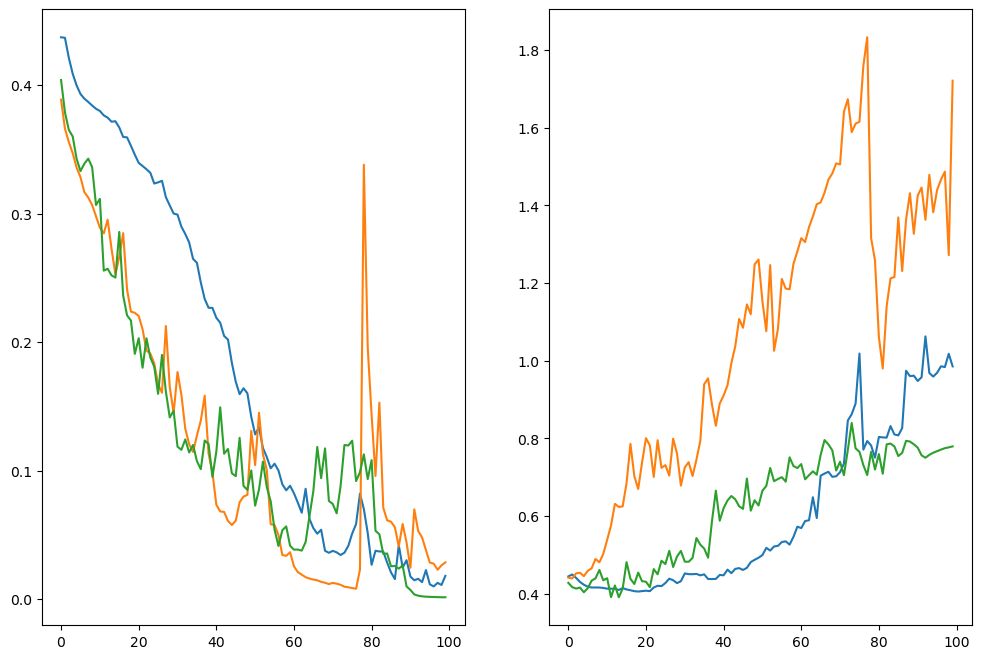

In [85]:
#plot learning curves for different activation functions
#first graph loss, second graph F1 score
#plot both train and validation curves
fig, ax = plt.subplots(1,2,figsize=(12,8))

for fun in ['sigmoid','Relu','Tanh']:
    
    #plot loss for 100 epochs
    ax[0].plot(loss_track_fun[fun][:100],label=f'Activation function : {fun}, train')
    ax[1].plot(val_loss_fun[fun][:100],label=f'Activation function : {fun}, val')
    


## Try different batch sizes

In [87]:
from sklearn.metrics import f1_score



loss = nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(),lr=0.01)






train_score_b = {}
val_score_b = {}
loss_track_b = {}
val_loss_b= {}
Epochs = 1000
for batch_size in [16,32,64,128,256,512]:
    
    from torch.utils.data import DataLoader
    train_dataloader = DataLoader(torch.utils.data.TensorDataset(X_train,y_train),batch_size=batch_size,shuffle=False)

    
    print(f'batch_size layer size : {batch_size}')
    from sklearn.metrics import f1_score
    network = NeuralNetwork2(n_features,256,n_output)


    loss = nn.BCELoss()
    optimizer = torch.optim.Adam(network.parameters(),lr=0.01)
    
    train_score_b[batch_size] = []
    val_score_b[batch_size] = []
    loss_track_b[batch_size] = []
    val_loss_b[batch_size] = []

    for epoch in range(Epochs):
        
        #Stoppping criterion
        if epoch > 100 and val_score_b[batch_size][-1] < val_score_b[batch_size][-2] and val_score_b[batch_size][-2] < val_score_b[batch_size][-3] and val_score_b[batch_size][-3] < val_score_b[batch_size][-4] and val_score_b[batch_size][-4] < val_score_b[batch_size][-5]:
            print(f'{batch_size}Early stopping at epoch {epoch}')
            print(f'Best score : {max(val_score_b[batch_size])} at epoch {np.argmax(val_score_b[batch_size])}')
            break
        
        for _,data in enumerate(train_dataloader):
            # Every data instance is an input + label pair
            inputs, labels = data
        
        
            optimizer.zero_grad()
            outputs = network(inputs)
            l = loss(outputs,labels)
            l.backward()
            optimizer.step()
        

        #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network(X_train)
        output_val = network(X_val)
        loss_track_b[batch_size].append(loss(output_train,y_train).item())
        val_loss_b[batch_size].append(loss(output_val,y_val).item())
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        train_score_b[batch_size].append(f1_score(y_train,output_train))
        val_score_b[batch_size].append(f1_score(y_val,output_val))
        
        if epoch % 100 == 0:
            print(f'Epoch {epoch} : Train loss {loss_track_b[batch_size][-1]} - Val loss {val_loss_b[batch_size][-1]} - Train score {train_score_b[batch_size][-1]} - Val score {val_score_b[batch_size][-1]}')
    


batch_size layer size : 16
Epoch 0 : Train loss 0.43776360154151917 - Val loss 0.44492006301879883 - Train score 0.1742627345844504 - Val score 0.16666666666666666
Epoch 100 : Train loss 0.020190877839922905 - Val loss 1.0594226121902466 - Train score 0.9881656804733728 - Val score 0.6666666666666666
16Early stopping at epoch 141
Best score : 0.6869806094182825 at epoch 103
batch_size layer size : 32
Epoch 0 : Train loss 0.43311649560928345 - Val loss 0.4466595947742462 - Train score 0.1213793103448276 - Val score 0.1313131313131313
Epoch 100 : Train loss 0.015303296037018299 - Val loss 0.984241247177124 - Train score 0.9895988112927191 - Val score 0.6629526462395543
32Early stopping at epoch 153
Best score : 0.6782608695652174 at epoch 99
batch_size layer size : 64
Epoch 0 : Train loss 0.43591704964637756 - Val loss 0.4413554072380066 - Train score 0.3854692230070636 - Val score 0.41635687732342
Epoch 100 : Train loss 0.019452271983027458 - Val loss 1.16279935836792 - Train score 0.98

## Best model

In [84]:
network_best = NeuralNetwork2(n_features,256,n_output)

loss = nn.BCELoss()
optimizer = torch.optim.Adam(network_best.parameters(),lr=0.01)




for epoch in range(114):
    
    #Stoppping criterion
   
    
    for _,data in enumerate(train_dataloader):
        # Every data instance is an input + label pair
        inputs, labels = data
    
    
        optimizer.zero_grad()
        outputs = network_best(inputs)
        l = loss(outputs,labels)
        l.backward()
        optimizer.step()
    

    if epoch == 113:
    #Add train and validation score (F1) and loss (BCE) to the lists
        output_train = network_best(X_train)
        output_val = network_best(X_val)
        
        output_train = output_train.detach().numpy()
        output_val = output_val.detach().numpy()
        
        output_train = np.where(output_train > 0.5,1,0)
        output_val = np.where(output_val > 0.5,1,0)
        
        #print accuracy
        print(f'Accuracy on train set : {f1_score(y_train,output_train)}')
        
        print(f'Accuracy on validation set : {f1_score(y_val,output_val)}')
        



Accuracy on train set : 0.9992509363295881
Accuracy on validation set : 0.6629213483146068


In [85]:
#score on test
output_test = network_best(X_test)
output_test = output_test.detach().numpy()
output_test = np.where(output_test > 0.5,1,0)
print(f'Accuracy on test set : {f1_score(y_test,output_test)}')

Accuracy on test set : 0.6377551020408163
